# Tutorial
## Getting started

In [1]:
import os
import sys
import re
import pprint
import numpy as np

In [2]:
import plotly
plotly.offline.init_notebook_mode() # Make plotly plot shown within notebook

Add **ImagingReso** to python path

In [3]:
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import ImagingReso
from ImagingReso.resonance import Resonance

## Initialization

Let's define our input

**layer1**
  - foil **Co** of thickness **0.025 mm** and density **8 g/cm<sup>3</sup>**

**layer2**
  - foil **Ag** of thickness **0.03 mm**
  
**layer3**
  - compound **UO<sub>3</sub>** of thickness **0.3 mm** and density **0.7875 g/cm<sup>3</sup>**

**global paramters**
  - min energy of **0.0001 eV** (has to be greater than **1 x 10<sup>-5</sup> eV**)
  - max energy of **300 eV** (has to be less than **3000 eV**)
  - energy steps to interpolate database: **0.1 eV**

In [4]:
_energy_min = 1
_energy_max = 300
_energy_step = 0.1

### Method 1

In [5]:
_stack = {'Co': {'elements': ['Co'],
                   'stoichiometric_ratio': [1],
                   'thickness': {'value': 0.025,
                                'units': 'mm'},
                   'density': {'value': 8,
                              'units': 'g/cm3'},
                  },
         'Ag': {'elements': ['Ag'],
               'stoichiometric_ratio': [1],
              'thickness': {'value': 0.03,
                            'units': 'mm'},
                'density': {'value': np.NaN,
                            'units': 'g/cm3'},
              },
          'UO3': {'elements': ['U','O'],
                   'stoichiometric_ratio': [1,3],
                   'thickness': {'value': 0.3,
                                'units': 'mm'},
                   'density': {'value': 0.7875,
                              'units': 'g/cm3'},
                  },
         }

In [6]:
o_reso = Resonance(stack=_stack, energy_min=_energy_min, energy_max=_energy_max, energy_step=_energy_step)

### Method 2

In [5]:
_layer_1 = 'Co'
_thickness_1 = 0.025 # mm
_density_1 = 8 # g/cm3 deviated due to porosity

_layer_2 = 'Ag'
_thickness_2 = 0.03 # mm

_layer_3 = 'UO3'
_thickness_3 = 0.3 # mm
_density_3 = 0.7875 # g/cm3

In [6]:
o_reso = Resonance(energy_min=_energy_min, energy_max=_energy_max, energy_step=_energy_step)
o_reso.add_layer(formula=_layer_1, thickness=_thickness_1, density=_density_1)
o_reso.add_layer(formula=_layer_2, thickness=_thickness_2)
o_reso.add_layer(formula=_layer_3, thickness=_thickness_3, density=_density_3)

## Retrieve parameters
To retrieve the stack defined, and also visualize the isotopes mass, ratio...etc automatically loaded by the program

In [7]:
pprint.pprint(o_reso.stack)

{'Ag': {'Ag': {'density': {'units': 'g/cm3', 'value': 10.5},
               'isotopes': {'density': {'units': 'g/cm3',
                                        'value': [10.406250187729098,
                                                  10.600899412431097,
                                                  10.698372226476385,
                                                  10.79563390786163]},
                            'file_names': ['Ag-107.csv',
                                           'Ag-109.csv',
                                           'Ag-110_m1.csv',
                                           'Ag-111.csv'],
                            'isotopic_ratio': [0.51839,
                                               0.48161000000000004,
                                               0.0,
                                               0.0],
                            'list': ['107-Ag', '109-Ag', '110-Ag', '111-Ag'],
                            'mass': {'units': 'g/mol',
      

Retrieve energy range

In [8]:
print("Energy min {} eV".format(o_reso.energy_min))
print("Energy max {} eV".format(o_reso.energy_max))
print("Energy step {} eV".format(o_reso.energy_step))

Energy min 1 eV
Energy max 300 eV
Energy step 0.1 eV


You can also retrieve the arrays of sigma (cross section) vs Energy (eV) for each of the isotopes and elements

In [9]:
pprint.pprint(o_reso.stack_sigma)

{'Ag': {'Ag': {'107-Ag': {'energy_eV': array([  1. ,   1.1,   1.2, ..., 299.8, 299.9, 300. ]),
                          'sigma_b': array([6.38859896, 6.21737371, 6.0646837 , ..., 2.13670063, 2.13207716,
       2.1273994 ]),
                          'sigma_b_raw': array([12.323924  , 11.993622  , 11.6990754 , ...,  4.12180139,
        4.1128825 ,  4.10385887])},
               '109-Ag': {'energy_eV': array([  1. ,   1.1,   1.2, ..., 299.8, 299.9, 300. ]),
                          'sigma_b': array([11.32518437, 11.29936025, 11.32271849, ...,  2.12286828,
        2.3148379 ,  2.62736264]),
                          'sigma_b_raw': array([23.51526   , 23.4616396 , 23.51013993, ...,  4.40785756,
        4.8064573 ,  5.45537393])},
               '110-Ag': {'energy_eV': array([  1. ,   1.1,   1.2, ..., 299.8, 299.9, 300. ]),
                          'sigma_b': array([0., 0., 0., ..., 0., 0., 0.]),
                          'sigma_b_raw': array([11.490193  , 10.8628336 , 10.325615  , ..., 

## Modify isotopic ratios

Let's presume that the **U** in our **UO<sub>3</sub>** layer does not have the default isotopic_ratio reported
```
 U-233 -> 0
 U-234 -> 5.5e-5
 U-235 -> 0.007
 U-238 -> 0.99
```

but instead

```
 U-233 -> 0
 U-234 -> 0
 U-235 -> 0.5
 U-238 -> 0.5
```


### Display current list of isotopic ratio 

To display all the isotopic ratio

In [10]:
pprint.pprint(o_reso.get_isotopic_ratio())

{'Ag': {'Ag': {'107-Ag': 0.51839,
               '109-Ag': 0.48161000000000004,
               '110-Ag': 0.0,
               '111-Ag': 0.0}},
 'Co': {'Co': {'58-Co': 0.0, '59-Co': 1.0}},
 'UO3': {'O': {'16-O': 0.9975700000000001, '17-O': 0.00037999999999999997},
         'U': {'230-U': 0.0,
               '231-U': 0.0,
               '232-U': 0.0,
               '233-U': 0.0,
               '234-U': 5.4999999999999995e-05,
               '235-U': 0.0072,
               '236-U': 0.0,
               '237-U': 0.0,
               '238-U': 0.992745,
               '239-U': 0.0,
               '240-U': 0.0,
               '241-U': 0.0}}}


From there, it's possible to narrow down the search to the compound and element we are looking for

In [11]:
pprint.pprint(o_reso.get_isotopic_ratio(compound='UO3', element='U'))  

{'230-U': 0.0,
 '231-U': 0.0,
 '232-U': 0.0,
 '233-U': 0.0,
 '234-U': 5.4999999999999995e-05,
 '235-U': 0.0072,
 '236-U': 0.0,
 '237-U': 0.0,
 '238-U': 0.992745,
 '239-U': 0.0,
 '240-U': 0.0,
 '241-U': 0.0}


In [12]:
pprint.pprint(o_reso.get_isotopic_ratio(compound='Ag', element='Ag'))

{'107-Ag': 0.51839, '109-Ag': 0.48161000000000004, '110-Ag': 0.0, '111-Ag': 0.0}


if compound is composef of only 1 element, **element** parameter can be omitted

In [13]:
pprint.pprint(o_reso.get_isotopic_ratio(compound='Ag'))

{'107-Ag': 0.51839, '109-Ag': 0.48161000000000004, '110-Ag': 0.0, '111-Ag': 0.0}


### Define a new set of isotopic ratio

In [14]:
new_list_ratio_1 = [0,0,0,0,0,0.5,0,0,0.5,0,0,0]
o_reso.set_isotopic_ratio(compound='UO3', element='U', list_ratio=new_list_ratio_1)
new_list_ratio_2 = [0.1, 0.9, 0.0, 0.0]
o_reso.set_isotopic_ratio(compound='Ag', element='Ag', list_ratio=new_list_ratio_2)

In [15]:
pprint.pprint(o_reso.get_isotopic_ratio(compound='UO3', element='U'))  

{'230-U': 0,
 '231-U': 0,
 '232-U': 0,
 '233-U': 0,
 '234-U': 0,
 '235-U': 0.5,
 '236-U': 0,
 '237-U': 0,
 '238-U': 0.5,
 '239-U': 0,
 '240-U': 0,
 '241-U': 0}


In [16]:
pprint.pprint(o_reso.get_isotopic_ratio(compound='Ag')) 

{'107-Ag': 0.1, '109-Ag': 0.9, '110-Ag': 0.0, '111-Ag': 0.0}


In [17]:
pprint.pprint(o_reso.get_isotopic_ratio())

{'Ag': {'Ag': {'107-Ag': 0.1, '109-Ag': 0.9, '110-Ag': 0.0, '111-Ag': 0.0}},
 'Co': {'Co': {'58-Co': 0.0, '59-Co': 1.0}},
 'UO3': {'O': {'16-O': 0.9975700000000001, '17-O': 0.00037999999999999997},
         'U': {'230-U': 0,
               '231-U': 0,
               '232-U': 0,
               '233-U': 0,
               '234-U': 0,
               '235-U': 0.5,
               '236-U': 0,
               '237-U': 0,
               '238-U': 0.5,
               '239-U': 0,
               '240-U': 0,
               '241-U': 0}}}


Using **set_isotopic_ratio**, the element *density*, *molar_mass* and *atoms_per_cm3* are automatically updated

In [18]:
pprint.pprint(o_reso.stack['Ag'])

{'Ag': {'density': {'units': 'g/cm3', 'value': 10.581434489960898},
        'isotopes': {'density': {'units': 'g/cm3',
                                 'value': [10.406250187729098,
                                           10.600899412431097,
                                           10.698372226476385,
                                           10.79563390786163]},
                     'file_names': ['Ag-107.csv',
                                    'Ag-109.csv',
                                    'Ag-110_m1.csv',
                                    'Ag-111.csv'],
                     'isotopic_ratio': [0.1, 0.9, 0.0, 0.0],
                     'list': ['107-Ag', '109-Ag', '110-Ag', '111-Ag'],
                     'mass': {'units': 'g/mol',
                              'value': [106.905093,
                                        108.904756,
                                        109.90611,
                                        110.905295]}},
        'molar_mass': {'units': 'g

In [19]:
pprint.pprint(o_reso.stack['UO3'])

{'O': {'density': {'units': 'g/cm3', 'value': 1.14},
       'isotopes': {'density': {'units': 'g/cm3',
                                'value': [1.1396804048398064,
                                          1.2112335406327737]},
                    'file_names': ['O-16.csv', 'O-17.csv'],
                    'isotopic_ratio': [0.9975700000000001,
                                       0.00037999999999999997],
                    'list': ['16-O', '17-O'],
                    'mass': {'units': 'g/mol',
                             'value': [15.9949146221, 16.9991315]}},
       'molar_mass': {'units': 'g/mol', 'value': 15.9994}},
 'U': {'density': {'units': 'g/cm3', 'value': 18.83205000815867},
       'isotopes': {'density': {'units': 'g/cm3',
                                'value': [18.313501988687005,
                                          18.393302210853296,
                                          18.472982640575044,
                                          18.552792392319066,
  

## Output
### Preview the transmission and attenuation resonance signals 

Those arrays for each Compound, element and isotopes are calculated during initialization of the object, but also 
every time one of the parameters is modified, such as density, stochiometric coefficient.

Those arrays are store in the **stack_signal** dictionary

In [20]:
pprint.pprint(o_reso.stack_signal)

{'Ag': {'Ag': {'107-Ag': {'attenuation': array([2.16705524e-04, 2.10898062e-04, 2.05719233e-04, ...,
       7.24835329e-05, 7.23266963e-05, 7.21680178e-05]),
                          'energy_eV': array([  1. ,   1.1,   1.2, ..., 299.8, 299.9, 300. ]),
                          'transmission': array([0.99978329, 0.9997891 , 0.99979428, ..., 0.99992752, 0.99992767,
       0.99992783])},
               '109-Ag': {'attenuation': array([0.00371494, 0.00370649, 0.00371414, ..., 0.00069741, 0.00076045,
       0.00086307]),
                          'energy_eV': array([  1. ,   1.1,   1.2, ..., 299.8, 299.9, 300. ]),
                          'transmission': array([0.99628506, 0.99629351, 0.99628586, ..., 0.99930259, 0.99923955,
       0.99913693])},
               '110-Ag': {'attenuation': array([0., 0., 0., ..., 0., 0., 0.]),
                          'energy_eV': array([  1. ,   1.1,   1.2, ..., 299.8, 299.9, 300. ]),
                          'transmission': array([1., 1., 1., ..., 1., 1.

Sigma arrays are store in the **stack_sigma** dictionary

In [21]:
pprint.pprint(o_reso.stack_sigma)

{'Ag': {'Ag': {'107-Ag': {'energy_eV': array([  1. ,   1.1,   1.2, ..., 299.8, 299.9, 300. ]),
                          'sigma_b': array([1.2323924 , 1.1993622 , 1.16990754, ..., 0.41218014, 0.41128825,
       0.41038589]),
                          'sigma_b_raw': array([12.323924  , 11.993622  , 11.6990754 , ...,  4.12180139,
        4.1128825 ,  4.10385887])},
               '109-Ag': {'energy_eV': array([  1. ,   1.1,   1.2, ..., 299.8, 299.9, 300. ]),
                          'sigma_b': array([21.163734  , 21.11547564, 21.15912594, ...,  3.9670718 ,
        4.32581157,  4.90983654]),
                          'sigma_b_raw': array([23.51526   , 23.4616396 , 23.51013993, ...,  4.40785756,
        4.8064573 ,  5.45537393])},
               '110-Ag': {'energy_eV': array([  1. ,   1.1,   1.2, ..., 299.8, 299.9, 300. ]),
                          'sigma_b': array([0., 0., 0., ..., 0., 0., 0.]),
                          'sigma_b_raw': array([11.490193  , 10.8628336 , 10.325615  , ..., 

You can retrieve any of those arrays, **transmission**, **attenuation** and **Energy (eV) (x-axis)** arrays as followed 

for the compound **UO<sub>3</sub>**

In [22]:
transmission_UO3 = o_reso.stack_signal['UO3']['transmission']
attenuation_UO3 = o_reso.stack_signal['UO3']['attenuation']
energy_UO3 = o_reso.stack_signal['UO3']['energy_eV']

for the element **U**

In [23]:
transmission_UO3_U = o_reso.stack_signal['UO3']['U']['transmission']
energy_UO3_U = o_reso.stack_signal['UO3']['U']['energy_eV']

or for the isotope **238-U**

In [24]:
transmission_UO3_U_238U = o_reso.stack_signal['UO3']['U']['238-U']['transmission']
energy_UO3_U_238U = o_reso.stack_signal['UO3']['U']['238-U']['energy_eV']

It's possible to retrieve the x_axis into **Angstroms** instead of **eV** as provided by default

### Display transmission or attenuation signals

Here are the flags available for the final plot (in **bold**, the default values)

 - x_axis: **'energy'** or 'lambda' or 'time' or 'number'. Type of x-axis.
 - y_axis: **'attenuation'** or 'transmission' or 'sigma' or 'sigma_raw'(database values). Type of y-axis.
 - logx: True or **False**. True -> display x in log scale.
 - logy: True or **False**. True -> display y in log scale.
 - mixed: **True** or False. Display the total signal.
 - all_layers: True or **False**. Dislay the signal of each compound/layer.
 - all_elements: True or **False**. Display the signal of each element.
 - all_isotopes: True or **False**. Display the signal of each isotope.
 - items_to_plot: **None**. List that defines what to plot. You need to define the path to the compound/element/isotope you want to see.
 
Parameters only available if you want to plot in `x_axis='time'` or `x_axis='number'`: 
 
 - time_unit: 's', **'us'**, 'ns'. Time unit for display.
 - t_start_us: **1**. Time when recording starts after event in micro-seconds. 
 - offset_us: **0**. Time offset in micro-seconds.
 - time_resolution_us: **0.16**. Time step setting in micro-seconds.
 - source_to_detector_m: **16**. Source to detector distance in meters.

Parameters to control plotting: 

 - ax_mpl: **None**. matplotlib.axes to plot against.
 - fmt: **'-'**. matplotlib.pyplot parameter.
 - ms: **2**. matplotlib.pyplot parameter.
 - lw: **1.5**. matplotlib.pyplot parameter.
 - alpha: **1**. matplotlib.pyplot parameter.
 - plotly: **False**. control to use plotly to display or not


example: 
   
   if we want to display the U element of the UO<sub>3</sub> layer
       items_to_plot = [['UO3','U']]
   if we want also to display the 235-U isotope of the element U of compound UO<sub>3</sub>
       items_to_plot = [['UO3', 'O'],['UO3','U','235-U']]
       
So here are a few examples of plot commands

`o_reso.plot(x_axis='lambda', all_layers=True)`

`o_reso.plot(items_to_plot=[['Co'], ['UO3'], ['Ag', 'Ag', '107-Ag'], ['Co', 'Co', '58-Co']])`


#### Plot **total attenuation** vs. **energy** (default)

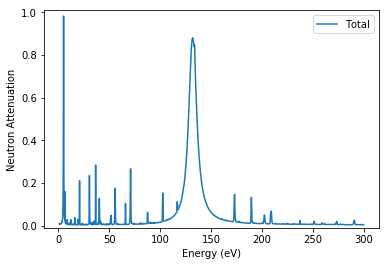

In [25]:
o_reso.plot()

**Note**: how to plot interactive figure using **plotly**?

You can do the following

In [26]:
plotly_fig = o_reso.plot(plotly=True)
plotly.offline.iplot(plotly_fig)

**Note**: how to plot interactive figure using **matplotlib**?

You can do the following

In [27]:
%matplotlib notebook

#### Plot **total transmission** vs. **wavelength**

<IPython.core.display.Javascript object>


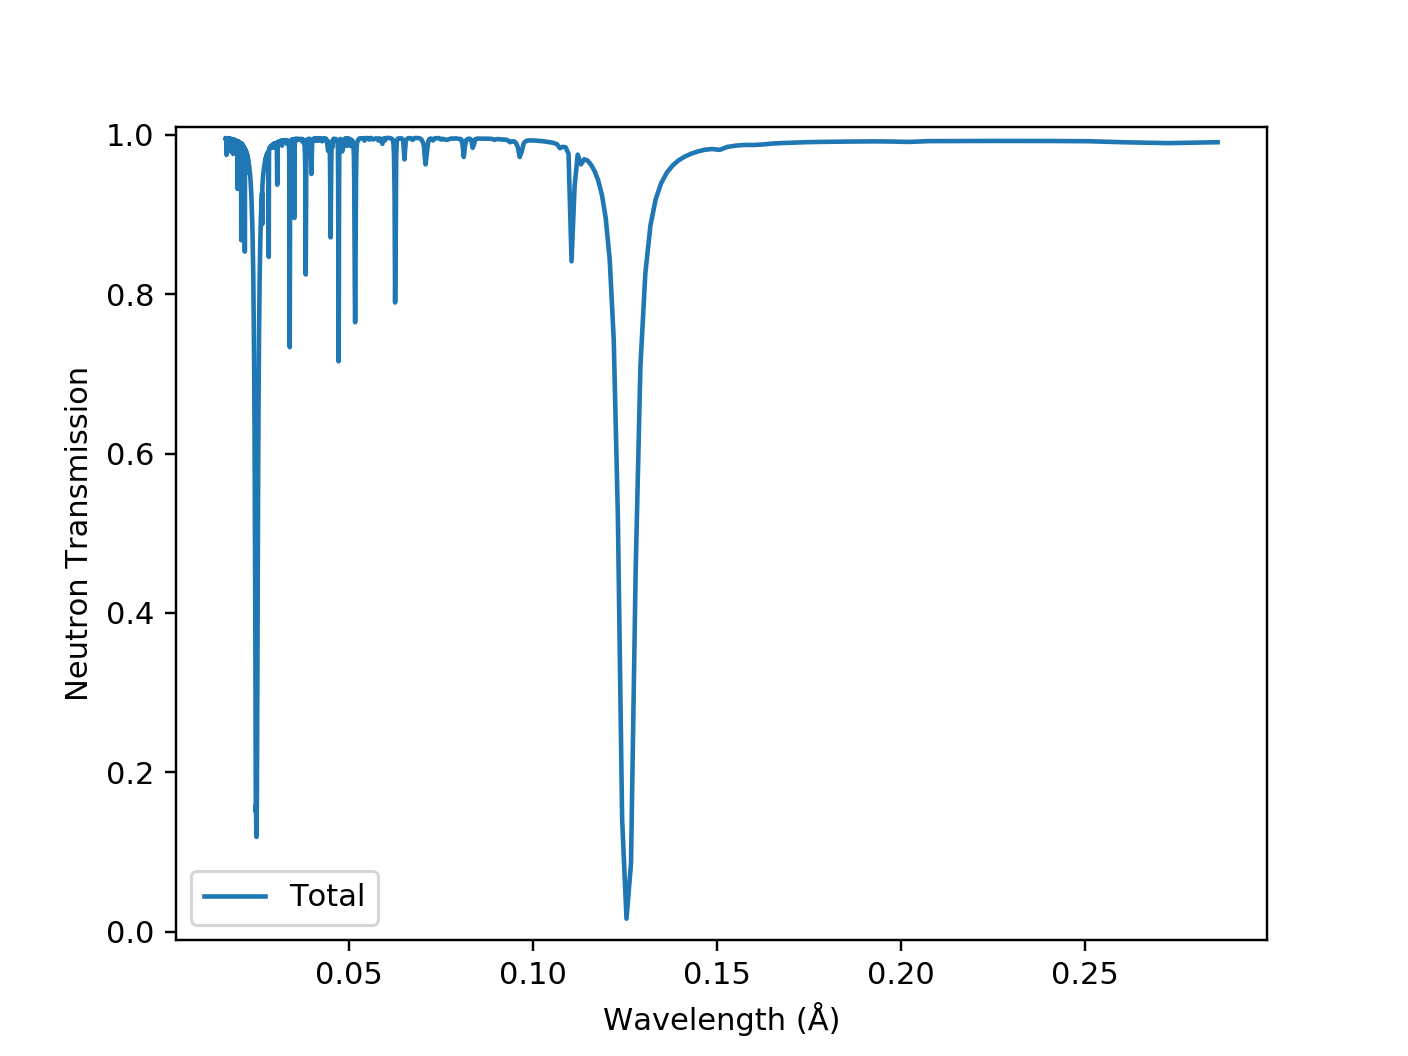

In [28]:
o_reso.plot(x_axis='lambda', y_axis='transmission')

#### Plot **attenuation** vs. **energy** of *all layers*

<IPython.core.display.Javascript object>


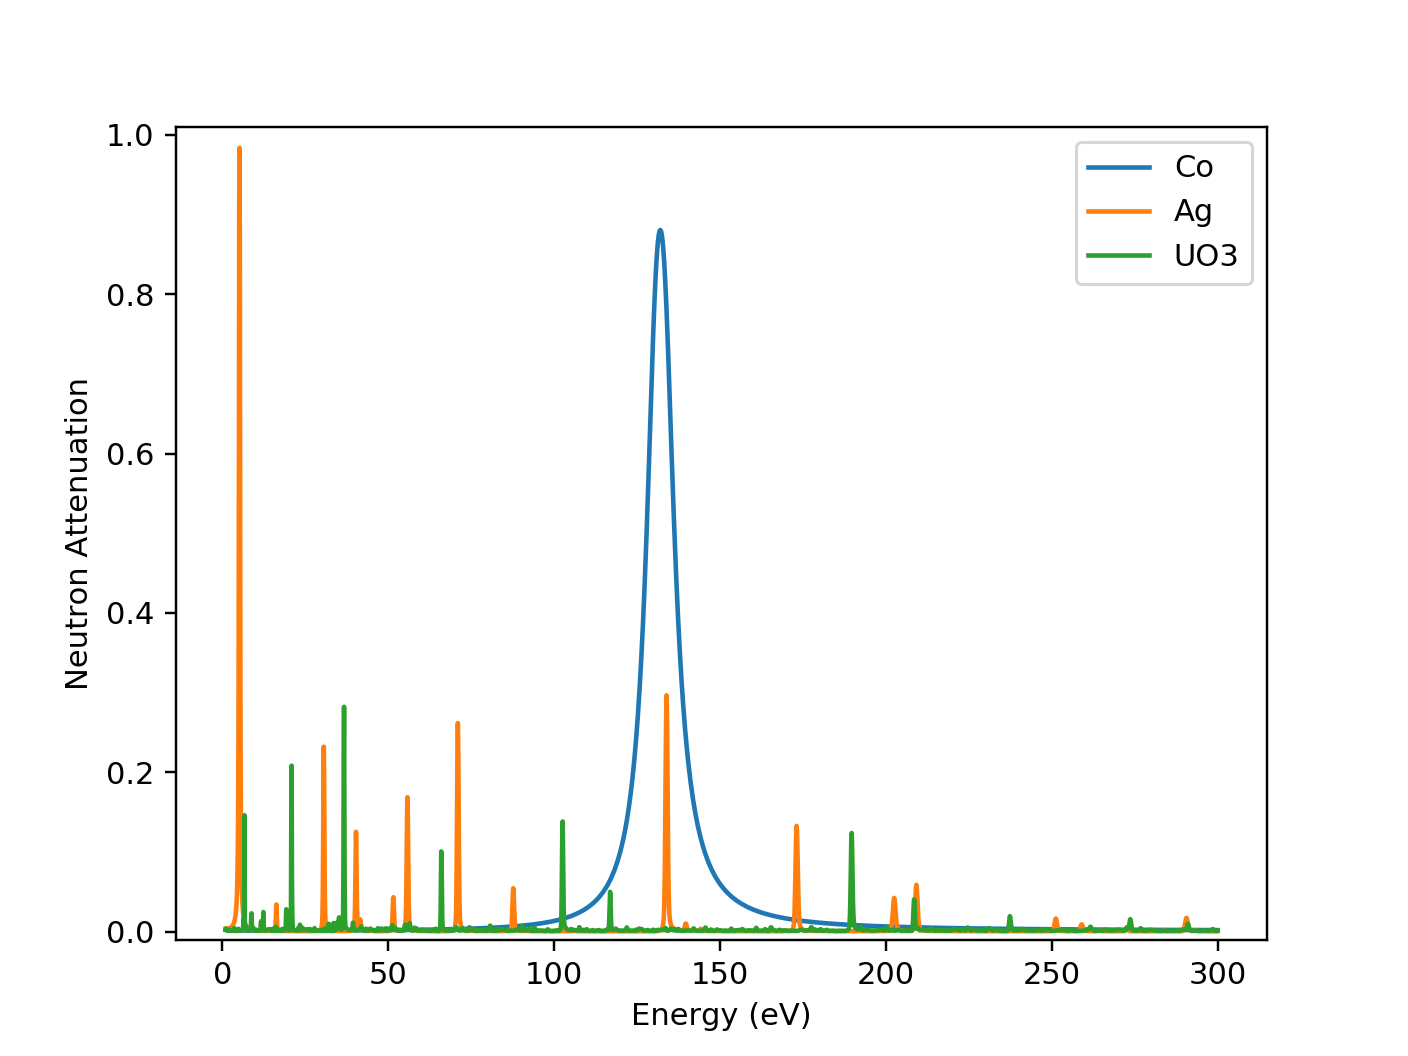

In [29]:
o_reso.plot(mixed=False, all_layers=True)

#### Plot **attenuation** vs. **energy** of *all elements*

<IPython.core.display.Javascript object>


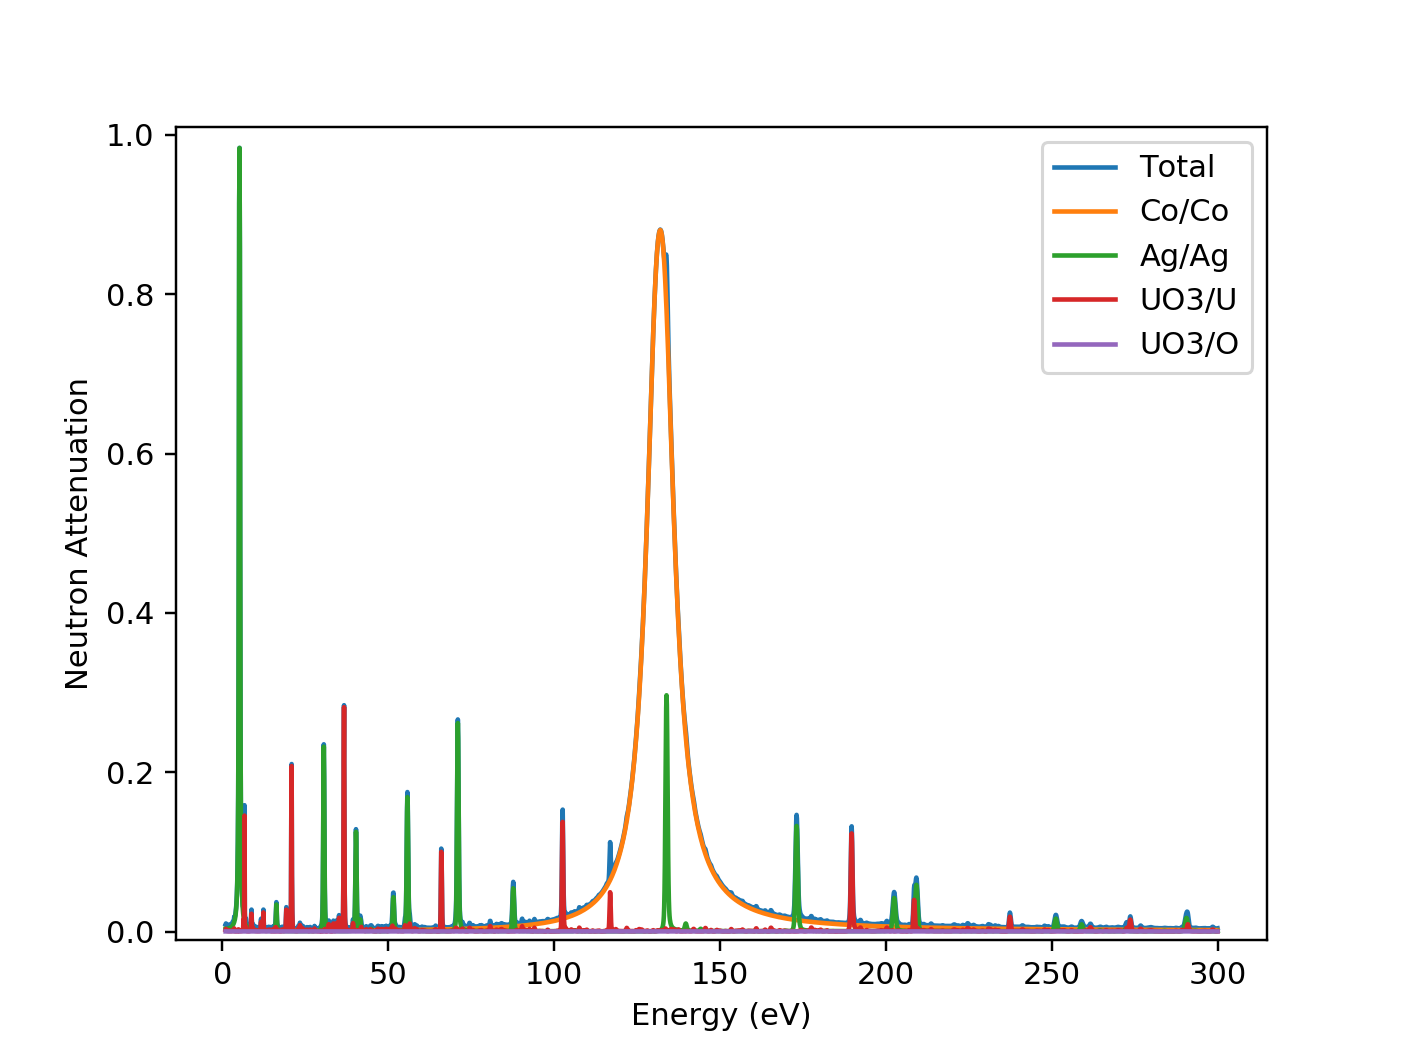

In [30]:
o_reso.plot(mixed=True, all_elements=True)

#### Plot **attenuation** vs. **energy** of *all isotopes*

<IPython.core.display.Javascript object>


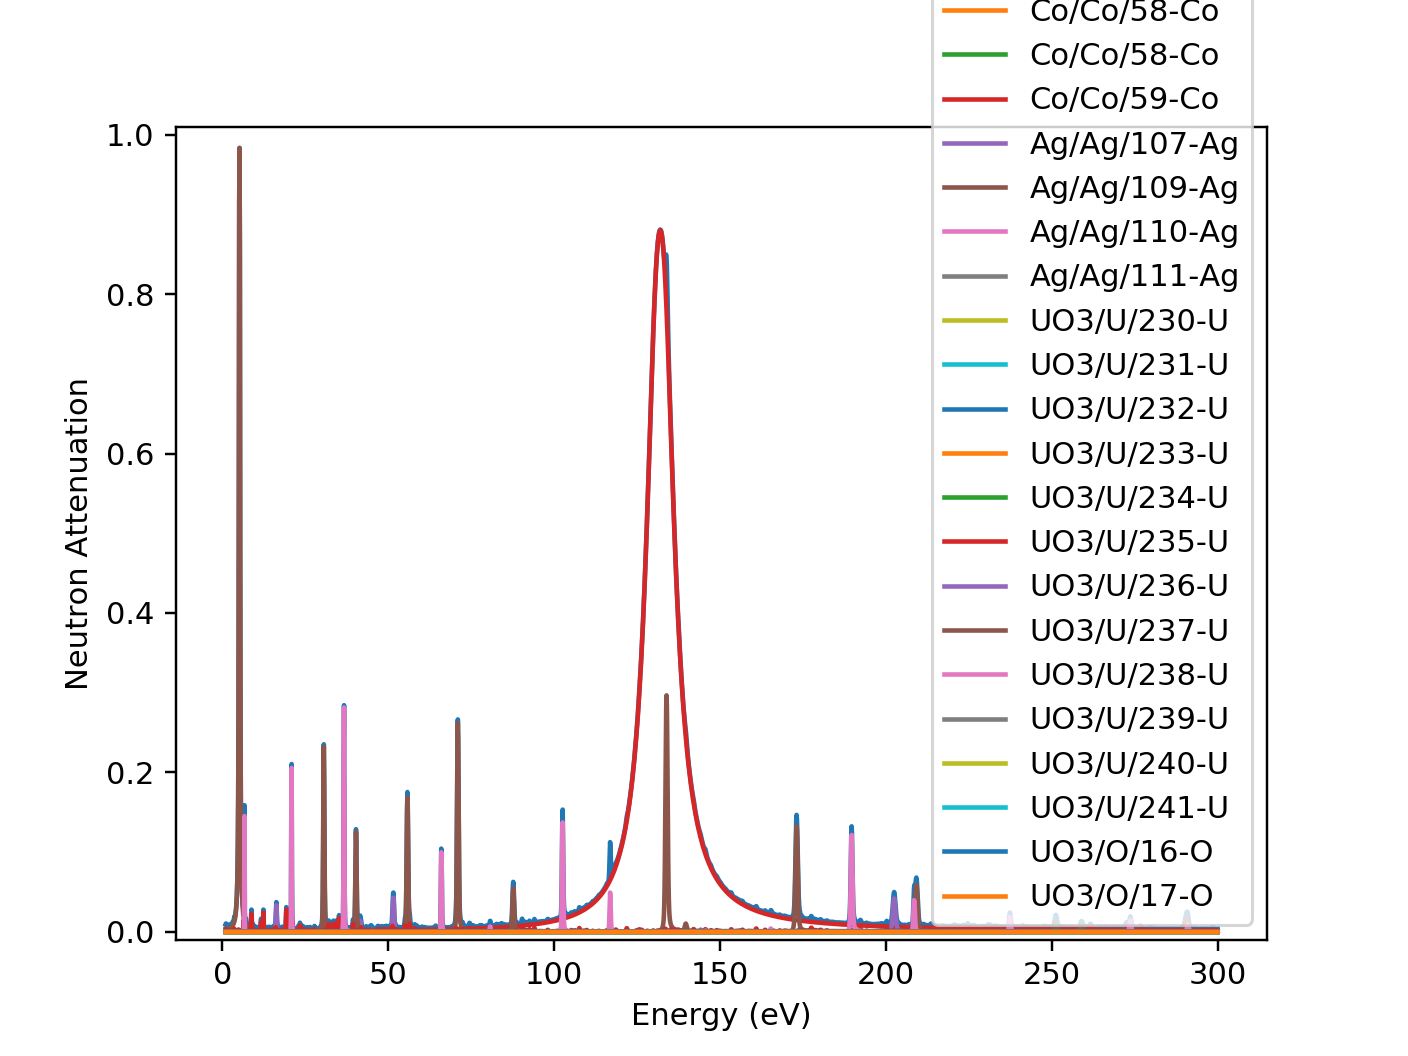

In [31]:
o_reso.plot(mixed=True, all_isotopes=True)

#### Plot **attenuation** vs. **energy** of *part/parts picked*

<IPython.core.display.Javascript object>


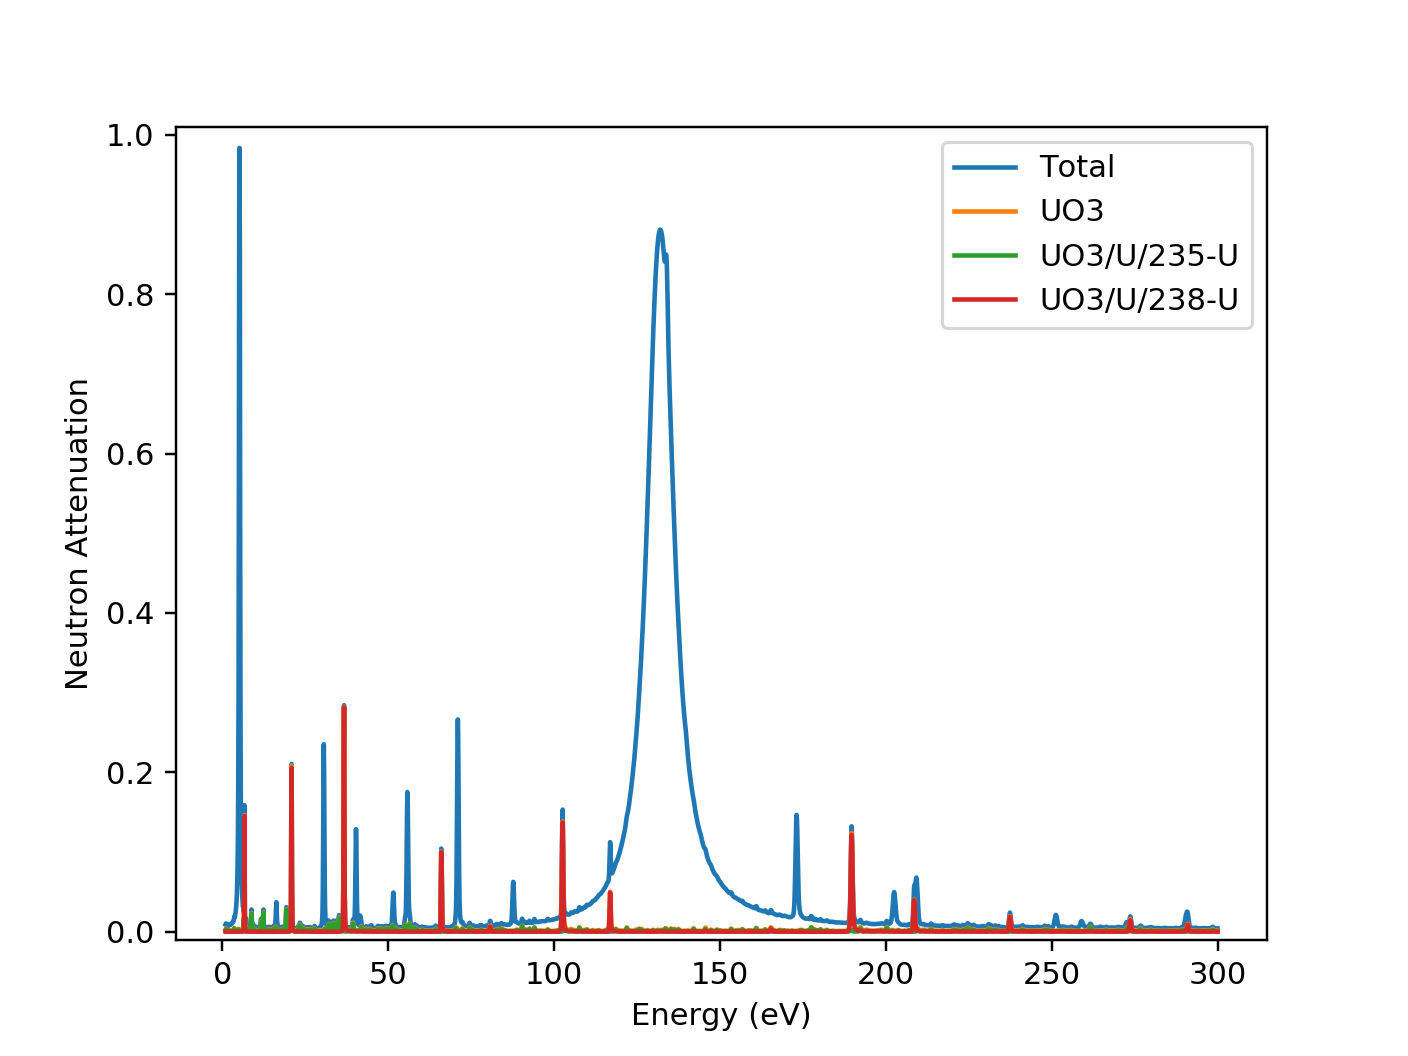

In [32]:
o_reso.plot(items_to_plot = [['UO3'],['UO3','U','235-U'],['UO3','U','238-U']])

<IPython.core.display.Javascript object>


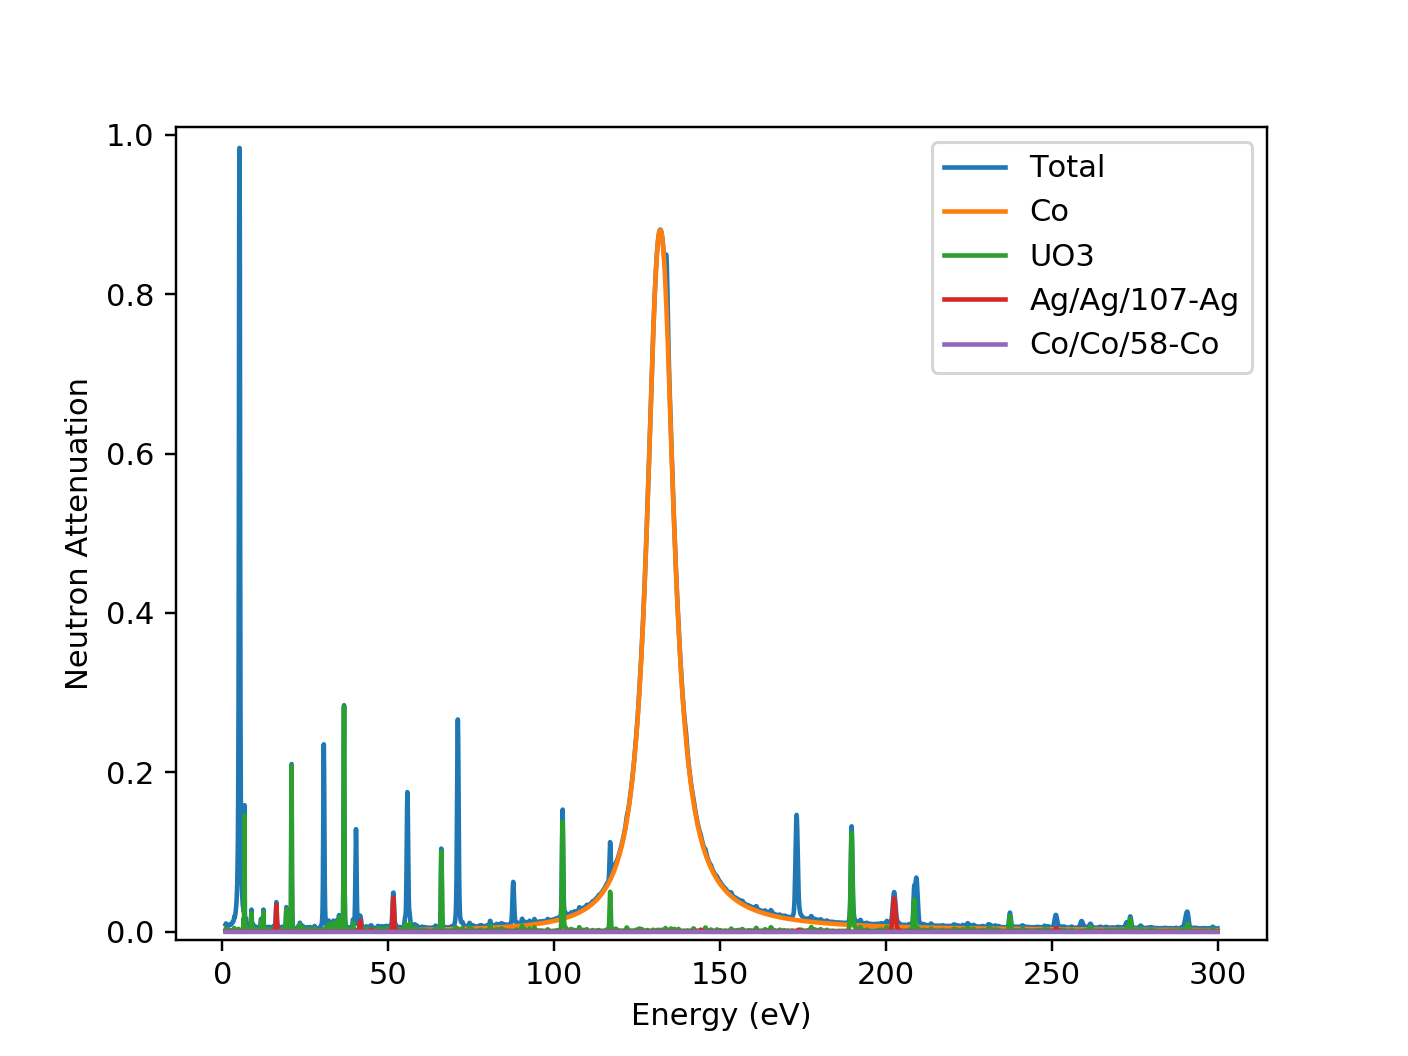

In [33]:
o_reso.plot(items_to_plot=[['Co'], ['UO3'], ['Ag', 'Ag', '107-Ag'], ['Co', 'Co', '58-Co']])

### Export transmission or attenuation signals

Similar to plotting option. Here are the flags available for the final plot (in **bold**, the default values)

 - x_axis: **'energy'** or 'lambda' or 'time' or 'number'. Type of x-axis to export.
 - y_axis: **'attenuation'** or 'transmission' or 'sigma'. Type of y-axis to export.
 - mixed: **True** or False. Export the total signal.
 - all_layers: True or **False**. Save the signal of each compound/layer.
 - all_elements: True or **False**. Save the signal of each element.
 - all_isotopes: True or **False**. Save the signal of each isotope.
 - output_type: **'df'** or 'csv' or 'clip'. Output to pd.DataFrame or .csv file or clipboard.
 - filename: **None** or 'YOUR_FILE_NAME.csv' (string with .csv suffix) to save as.
 - items_to_export: List that defines what to export. 
 You need to define the path to the compound/element/isotope you want to export.

Parameters only available if you want to plot in `x_axis='time'` or `x_axis='number'`: 
 
 - time_unit: **'us'**. Time unit for display.
 - t_start_us: **1**. Time when recording starts after event in micro-seconds. 
 - offset_us: **0**. Time offset in micro-seconds.
 - time_resolution_us: **0.16**. Time step setting in micro-seconds.
 - source_to_detector_m: **16**. Source to detector distance in meters.
       
So here are a few examples of export commands

`o_reso.export(output_type='df', y_axis='attenuation', all_elements=True)`

`o_reso.export(y_axis='attenuation', items_to_export=[['Co'], ['Ag'], ['Ag', 'Ag', '107-Ag'], ['Co', 'Co', '58-Co']])`

However, when `y_axis='sigma'`, export of sigma at compound level is not currently supported, then, 

`items_to_export=[['Co'], ['Ag']]` 

has to be formatted as shaped as

`items_to_export=[['Co', 'Co'], ['Ag', 'Ag']]`


In [34]:
o_reso.export(output_type='clip', x_axis='energy', y_axis='attenuation', all_layers=True)

Exporting to clipboard completed.


In [35]:
o_reso.export(output_type='csv', x_axis='energy', y_axis='attenuation', all_layers=True)

Exporting to file ('./data.csv') completed.


In [36]:
o_reso.export(output_type='csv', filename='FILE_NAME', x_axis='energy', y_axis='attenuation', all_layers=True)

Exporting to file ('./FILE_NAME.csv') completed.


In [37]:
o_reso.export(x_axis='energy', y_axis='attenuation', all_layers=True)

Energy (eV)  Total_attenuation        Co        Ag       UO3
0             1.0           0.009434  0.002441  0.003931  0.003091
1             1.1           0.010572  0.002386  0.003917  0.004305
2             1.2           0.009546  0.002338  0.003919  0.003319
3             1.3           0.008201  0.002296  0.003940  0.001987
4             1.4           0.007932  0.002257  0.003974  0.001720
5             1.5           0.007851  0.002223  0.004022  0.001626
6             1.6           0.007847  0.002192  0.004088  0.001585
7             1.7           0.007876  0.002165  0.004169  0.001561
8             1.8           0.007937  0.002139  0.004265  0.001552
9             1.9           0.008060  0.002115  0.004376  0.001588
10            2.0           0.009081  0.002093  0.004502  0.002511
11            2.1           0.008595  0.002074  0.004650  0.001893
12            2.2           0.008367  0.002055  0.004819  0.001514
13            2.3           0.008491  0.002038  0.005010  0.001463
14            2.4           0.008665  0.002021  0.005228  0.001436
15            2.5           0.008873  0.002006  0.005475  0.001414
16            2.6           0.009113  0.001992  0.005755  0.001389
17            2.7           0.009413  0.001978  0.006073  0.001385
18            2.8           0.009914  0.001965  0.006435  0.001539
19            2.9           0.010456  0.001953  0.006843  0.001689
20            3.0           0.011087  0.001942  0.007317  0.001860
21            3.1           0.012305  0.001931  0.007868  0.002546
22            3.2           0.012894  0.001920  0.008501  0.002515
23            3.3           0.012870  0.001910  0.009242  0.001755
24            3.4           0.013731  0.001901  0.010114  0.001755
25            3.5           0.015274  0.001892  0.011145  0.002288
26            3.6           0.019032  0.001884  0.012380  0.004860
27            3.7           0.017958  0.001876  0.013875  0.002268
28            3.8           0.018892  0.001868  0.015703  0.001375
29            3.9           0.021020  0.001860  0.017971  0.001247
...           ...                ...       ...       ...       ...
2961        297.1           0.004456  0.002249  0.000719  0.001494
2962        297.2           0.004478  0.002247  0.000717  0.001519
2963        297.3           0.004477  0.002246  0.000715  0.001522
2964        297.4           0.004446  0.002244  0.000713  0.001495
2965        297.5           0.004391  0.002243  0.000711  0.001443
2966        297.6           0.004329  0.002242  0.000709  0.001384
2967        297.7           0.004282  0.002240  0.000707  0.001340
2968        297.8           0.004276  0.002239  0.000705  0.001337
2969        297.9           0.004339  0.002237  0.000703  0.001404
2970        298.0           0.004507  0.002236  0.000702  0.001576
2971        298.1           0.004810  0.002235  0.000700  0.001883
2972        298.2           0.005245  0.002233  0.000698  0.002322
2973        298.3           0.005744  0.002232  0.000697  0.002825
2974        298.4           0.006180  0.002231  0.000695  0.003265
2975        298.5           0.006413  0.002229  0.000694  0.003502
2976        298.6           0.006369  0.002228  0.000692  0.003460
2977        298.7           0.006081  0.002226  0.000691  0.003174
2978        298.8           0.005663  0.002225  0.000690  0.002758
2979        298.9           0.005243  0.002224  0.000689  0.002339
2980        299.0           0.004899  0.002222  0.000689  0.001995
2981        299.1           0.004649  0.002221  0.000689  0.001746
2982        299.2           0.004482  0.002220  0.000689  0.001579
2983        299.3           0.004372  0.002218  0.000691  0.001469
2984        299.4           0.004305  0.002217  0.000694  0.001399
2985        299.5           0.004267  0.002215  0.000701  0.001357
2986        299.6           0.004254  0.002214  0.000712  0.001333
2987        299.7           0.004263  0.002213  0.000733  0.001323
2988        299.8           0.004297  0.002211  0.000

In [38]:
o_reso.export(x_axis='lambda', y_axis='transmission', all_elements=True)

Wavelength (Å)  Total_transmission     Co/Co     Ag/Ag     UO3/U  \
0           0.285984            0.990566  0.997559  0.996069  0.997484   
1           0.272675            0.989428  0.997614  0.996083  0.996269   
2           0.261067            0.990454  0.997662  0.996081  0.997256   
3           0.250825            0.991799  0.997704  0.996060  0.998589   
4           0.241701            0.992068  0.997743  0.996026  0.998856   
5           0.233505            0.992149  0.997777  0.995978  0.998950   
6           0.226090            0.992153  0.997808  0.995912  0.998991   
7           0.219340            0.992124  0.997835  0.995831  0.999015   
8           0.213160            0.992063  0.997861  0.995735  0.999024   
9           0.207475            0.991940  0.997885  0.995624  0.998988   
10          0.202221            0.990919  0.997907  0.995498  0.998064   
11          0.197348            0.991405  0.997926  0.995350  0.998683   
12          0.192811            0.991633  0.997945  0.995181  0.999062   
13          0.188572            0.991509  0.997962  0.994990  0.999113   
14          0.184602            0.991335  0.997979  0.994772  0.999140   
15          0.180872            0.991127  0.997994  0.994525  0.999163   
16          0.177360            0.990887  0.998008  0.994245  0.999187   
17          0.174044            0.990587  0.998022  0.993927  0.999191   
18          0.170908            0.990086  0.998035  0.993565  0.999037   
19          0.167936            0.989544  0.998047  0.993157  0.998887   
20          0.165113            0.988913  0.998058  0.992683  0.998716   
21          0.162428            0.987695  0.998069  0.992132  0.998030   
22          0.159870            0.987106  0.998080  0.991499  0.998061   
23          0.157429            0.987130  0.998090  0.990758  0.998821   
24          0.155097            0.986269  0.998099  0.989886  0.998821   
25          0.152865            0.984726  0.998108  0.988855  0.998288   
26          0.150727            0.980968  0.998116  0.987620  0.995714   
27          0.148676            0.982042  0.998124  0.986125  0.998307   
28          0.146707            0.981108  0.998132  0.984297  0.999201   
29          0.144814            0.978980  0.998140  0.982029  0.999329   
...              ...                 ...       ...       ...       ...   
2961        0.016592            0.995544  0.997751  0.999281  0.999082   
2962        0.016589            0.995522  0.997753  0.999283  0.999056   
2963        0.016586            0.995523  0.997754  0.999285  0.999054   
2964        0.016583            0.995554  0.997756  0.999287  0.999081   
2965        0.016581            0.995609  0.997757  0.999289  0.999133   
2966        0.016578            0.995671  0.997758  0.999291  0.999192   
2967        0.016575            0.995718  0.997760  0.999293  0.999236   
2968        0.016572            0.995724  0.997761  0.999295  0.999239   
2969        0.016569            0.995661  0.997763  0.999297  0.999172   
2970        0.016567            0.995493  0.997764  0.999298  0.999000   
2971        0.016564            0.995190  0.997765  0.999300  0.998693   
2972        0.016561            0.994755  0.997767  0.999302  0.998253   
2973        0.016558            0.994256  0.997768  0.999303  0.997750   
2974        0.016556            0.993820  0.997769  0.999305  0.997310   
2975        0.016553            0.993587  0.997771  0.999306  0.997072   
2976        0.016550            0.993631  0.997772  0.999308  0.997115   
2977        0.016547            0.993919  0.997774  0.999309  0.997401   
2978        0.016544            0.994337  0.997775  0.999310  0.997817   
2979        0.016542            0.994757  0.997776  0.999311  0.998237   
2980        0.016539            0.995101  0.997778  0.999311  0.998581   
2981        0.016536            0.995351  0.997779  0.999311  0.998829   
2982        0.016533            0.995518  0.997780  0.999311  0.998997   
2983      

In [39]:
o_reso.export(x_axis='energy', y_axis='attenuation', all_isotopes=True)

Energy (eV)  Total_attenuation  Co/Co/58-Co  Co/Co/59-Co  Ag/Ag/107-Ag  \
0             1.0           0.006620          0.0     0.002441      0.001123   
1             1.1           0.006547          0.0     0.002386      0.001093   
2             1.2           0.006460          0.0     0.002338      0.001066   
3             1.3           0.006388          0.0     0.002296      0.001042   
4             1.4           0.006344          0.0     0.002257      0.001021   
5             1.5           0.006315          0.0     0.002223      0.001001   
6             1.6           0.006303          0.0     0.002192      0.000983   
7             1.7           0.006302          0.0     0.002165      0.000967   
8             1.8           0.006313          0.0     0.002139      0.000951   
9             1.9           0.006335          0.0     0.002115      0.000937   
10            2.0           0.006381          0.0     0.002093      0.000923   
11            2.1           0.006420          0.0     0.002074      0.000911   
12            2.2           0.006474          0.0     0.002055      0.000899   
13            2.3           0.006548          0.0     0.002038      0.000889   
14            2.4           0.006637          0.0     0.002021      0.000878   
15            2.5           0.006744          0.0     0.002006      0.000868   
16            2.6           0.006870          0.0     0.001992      0.000859   
17            2.7           0.007018          0.0     0.001978      0.000850   
18            2.8           0.007193          0.0     0.001965      0.000841   
19            2.9           0.007392          0.0     0.001953      0.000833   
20            3.0           0.007629          0.0     0.001942      0.000826   
21            3.1           0.007916          0.0     0.001931      0.000818   
22            3.2           0.008237          0.0     0.001920      0.000811   
23            3.3           0.008606          0.0     0.001910      0.000804   
24            3.4           0.009057          0.0     0.001901      0.000798   
25            3.5           0.009602          0.0     0.001892      0.000791   
26            3.6           0.010286          0.0     0.001884      0.000785   
27            3.7           0.011038          0.0     0.001876      0.000779   
28            3.8           0.011993          0.0     0.001868      0.000774   
29            3.9           0.013196          0.0     0.001860      0.000768   
...           ...                ...          ...          ...           ...   
2961        297.1           0.004222          0.0     0.002249      0.000395   
2962        297.2           0.004218          0.0     0.002247      0.000394   
2963        297.3           0.004214          0.0     0.002246      0.000394   
2964        297.4           0.004209          0.0     0.002244      0.000393   
2965        297.5           0.004204          0.0     0.002243      0.000392   
2966        297.6           0.004200          0.0     0.002242      0.000392   
2967        297.7           0.004195          0.0     0.002240      0.000391   
2968        297.8           0.004191          0.0     0.002239      0.000390   
2969        297.9           0.004188          0.0     0.002237      0.000390   
2970        298.0           0.004187          0.0     0.002236      0.000389   
2971        298.1           0.004188          0.0     0.002235      0.000388   
2972        298.2           0.004190          0.0     0.002233      0.000388   
2973        298.3           0.004194          0.0     0.002232      0.000387   
2974        298.4           0.004197          0.0     0.002231      0.000386   
2975        298.5           0.004197          0.0     0.002229      0.000386   
2976        298.6           0.004192          0.0     0.002228      0.000385   
2977        298.7           0.004185          0.0     0.002226      0.000384   
2978        298.8           0.004176          0.0     0.002225      0.000383   
2979  

In [40]:
o_reso.export(x_axis='energy', y_axis='attenuation', items_to_export=[['Co', 'Co'], ['Ag', 'Ag'], ['Ag', 'Ag', '107-Ag'], ['Co', 'Co', '58-Co']])

Energy (eV)  Total_attenuation     Co/Co     Ag/Ag  Ag/Ag/107-Ag  \
0             1.0           0.006620  0.002441  0.003110      0.001123   
1             1.1           0.006547  0.002386  0.003076      0.001093   
2             1.2           0.006460  0.002338  0.003053      0.001066   
3             1.3           0.006388  0.002296  0.003043      0.001042   
4             1.4           0.006344  0.002257  0.003042      0.001021   
5             1.5           0.006315  0.002223  0.003050      0.001001   
6             1.6           0.006303  0.002192  0.003070      0.000983   
7             1.7           0.006302  0.002165  0.003098      0.000967   
8             1.8           0.006313  0.002139  0.003136      0.000951   
9             1.9           0.006335  0.002115  0.003182      0.000937   
10            2.0           0.006381  0.002093  0.003238      0.000923   
11            2.1           0.006420  0.002074  0.003306      0.000911   
12            2.2           0.006474  0.002055  0.003386      0.000899   
13            2.3           0.006548  0.002038  0.003479      0.000889   
14            2.4           0.006637  0.002021  0.003586      0.000878   
15            2.5           0.006744  0.002006  0.003710      0.000868   
16            2.6           0.006870  0.001992  0.003851      0.000859   
17            2.7           0.007018  0.001978  0.004014      0.000850   
18            2.8           0.007193  0.001965  0.004201      0.000841   
19            2.9           0.007392  0.001953  0.004412      0.000833   
20            3.0           0.007629  0.001942  0.004659      0.000826   
21            3.1           0.007916  0.001931  0.004949      0.000818   
22            3.2           0.008237  0.001920  0.005282      0.000811   
23            3.3           0.008606  0.001910  0.005674      0.000804   
24            3.4           0.009057  0.001901  0.006137      0.000798   
25            3.5           0.009602  0.001892  0.006685      0.000791   
26            3.6           0.010286  0.001884  0.007344      0.000785   
27            3.7           0.011038  0.001876  0.008143      0.000779   
28            3.8           0.011993  0.001868  0.009122      0.000774   
29            3.9           0.013196  0.001860  0.010339      0.000768   
...           ...                ...       ...       ...           ...   
2961        297.1           0.004222  0.002249  0.000739      0.000395   
2962        297.2           0.004218  0.002247  0.000737      0.000394   
2963        297.3           0.004214  0.002246  0.000736      0.000394   
2964        297.4           0.004209  0.002244  0.000734      0.000393   
2965        297.5           0.004204  0.002243  0.000732      0.000392   
2966        297.6           0.004200  0.002242  0.000731      0.000392   
2967        297.7           0.004195  0.002240  0.000729      0.000391   
2968        297.8           0.004191  0.002239  0.000728      0.000390   
2969        297.9           0.004188  0.002237  0.000726      0.000390   
2970        298.0           0.004187  0.002236  0.000724      0.000389   
2971        298.1           0.004188  0.002235  0.000723      0.000388   
2972        298.2           0.004190  0.002233  0.000721      0.000388   
2973        298.3           0.004194  0.002232  0.000720      0.000387   
2974        298.4           0.004197  0.002231  0.000718      0.000386   
2975        298.5           0.004197  0.002229  0.000717      0.000386   
2976        298.6           0.004192  0.002228  0.000716      0.000385   
2977        298.7           0.004185  0.002226  0.000714      0.000384   
2978        298.8           0.004176  0.002225  0.000713      0.000383   
2979        298.9           0.004167  0.002224  0.000712      0.000383   
2980        299.0           0.004159  0.002222  0.000711      0.000382   
2981        299.1           0.004152  0.002221  0.000710      0.000381   
2982        299.2           0.004148  0.002220  0.000710      0.000380   
2983      

In [41]:
o_reso.export(x_axis='energy', y_axis='sigma', items_to_export=[['Co', 'Co'], ['Ag', 'Ag'], ['Ag', 'Ag', '107-Ag'], ['Co', 'Co', '58-Co']])

Energy (eV)      Co/Co      Ag/Ag  Ag/Ag/107-Ag  Co/Co/58-Co
0             1.0  11.959685  17.713783      6.388599          0.0
1             1.1  11.688976  17.516734      6.217374          0.0
2             1.2  11.450931  17.387402      6.064684          0.0
3             1.3  11.245277  17.327826      5.928510          0.0
4             1.4  11.057332  17.322614      5.806609          0.0
5             1.5  10.888202  17.368430      5.693602          0.0
6             1.6  10.739224  17.481243      5.592414          0.0
7             1.7  10.602870  17.644822      5.498680          0.0
8             1.8  10.477530  17.859198      5.411516          0.0
9             1.9  10.361744  18.124703      5.330112          0.0
10            2.0  10.254191  18.441965      5.253739          0.0
11            2.1  10.158660  18.830038      5.182907          0.0
12            2.2  10.064614  19.286575      5.116612          0.0
13            2.3   9.980954  19.817766      5.054946          0.0
14            2.4   9.899685  20.429130      4.994787          0.0
15            2.5   9.825590  21.134159      4.939153          0.0
16            2.6   9.754517  21.942976      4.885446          0.0
17            2.7   9.688478  22.872325      4.834951          0.0
18            2.8   9.625739  23.937439      4.786604          0.0
19            2.9   9.566298  25.143641      4.740404          0.0
20            3.0   9.510262  26.557000      4.696465          0.0
21            3.1   9.456268  28.210924      4.653884          0.0
22            3.2   9.405884  30.115010      4.613716          0.0
23            3.3   9.356704  32.355500      4.574354          0.0
24            3.4   9.311164  35.002959      4.537461          0.0
25            3.5   9.266145  38.140525      4.500921          0.0
26            3.6   9.226341  41.912926      4.466874          0.0
27            3.7   9.186538  46.492384      4.433104          0.0
28            3.8   9.146734  52.109483      4.401276          0.0
29            3.9   9.108344  59.098957      4.369945          0.0
...           ...        ...        ...           ...          ...
2961        297.1  11.015434   4.204240      2.246435          0.0
2962        297.2  11.008362   4.194571      2.242829          0.0
2963        297.3  11.001290   4.184955      2.239223          0.0
2964        297.4  10.994218   4.175443      2.235524          0.0
2965        297.5  10.987146   4.165951      2.231801          0.0
2966        297.6  10.980217   4.156662      2.228077          0.0
2967        297.7  10.973490   4.147412      2.224353          0.0
2968        297.8  10.966764   4.138323      2.220567          0.0
2969        297.9  10.960037   4.129169      2.216691          0.0
2970        298.0  10.953311   4.120223      2.212816          0.0
2971        298.1  10.946584   4.111438      2.208941          0.0
2972        298.2  10.939858   4.102826      2.205059          0.0
2973        298.3  10.933131   4.094265      2.201023          0.0
2974        298.4  10.926405   4.085945      2.196987          0.0
2975        298.5  10.919678   4.077908      2.192951          0.0
2976        298.6  10.912951   4.070226      2.188914          0.0
2977        298.7  10.906225   4.062863      2.184765          0.0
2978        298.8  10.899498   4.055993      2.180558          0.0
2979        298.9  10.892772   4.049825      2.176352          0.0
2980        299.0  10.886045   4.044626      2.172145          0.0
2981        299.1  10.879319   4.040733      2.167899          0.0
2982        299.2  10.872592   4.038737      2.163560          0.0
2983        299.3  10.865866   4.039858      2.159210          0.0
2984        299.4  10.859139   4.045947      2.154777          0.0
2985        299.5  10.852413   4.061028      2.150345          0.0
2986        299.6  10.845686   4.092345      2.145825          0.0
2987        299.7  10.838960   4.151496      2.141299          0.0
2988        299.8  10.832233   4.259569      2.136701

In [42]:
o_reso.export(x_axis='energy', y_axis='sigma', all_isotopes=True)

Energy (eV)  Co/Co/atoms_per_cm3      Co/Co  Co/Co/58-Co  Co/Co/59-Co  \
0             1.0         8.174870e+22  11.959685          0.0    11.959685   
1             1.1         8.174870e+22  11.688976          0.0    11.688976   
2             1.2         8.174870e+22  11.450931          0.0    11.450931   
3             1.3         8.174870e+22  11.245277          0.0    11.245277   
4             1.4         8.174870e+22  11.057332          0.0    11.057332   
5             1.5         8.174870e+22  10.888202          0.0    10.888202   
6             1.6         8.174870e+22  10.739224          0.0    10.739224   
7             1.7         8.174870e+22  10.602870          0.0    10.602870   
8             1.8         8.174870e+22  10.477530          0.0    10.477530   
9             1.9         8.174870e+22  10.361744          0.0    10.361744   
10            2.0         8.174870e+22  10.254191          0.0    10.254191   
11            2.1         8.174870e+22  10.158660          0.0    10.158660   
12            2.2         8.174870e+22  10.064614          0.0    10.064614   
13            2.3         8.174870e+22   9.980954          0.0     9.980954   
14            2.4         8.174870e+22   9.899685          0.0     9.899685   
15            2.5         8.174870e+22   9.825590          0.0     9.825590   
16            2.6         8.174870e+22   9.754517          0.0     9.754517   
17            2.7         8.174870e+22   9.688478          0.0     9.688478   
18            2.8         8.174870e+22   9.625739          0.0     9.625739   
19            2.9         8.174870e+22   9.566298          0.0     9.566298   
20            3.0         8.174870e+22   9.510262          0.0     9.510262   
21            3.1         8.174870e+22   9.456268          0.0     9.456268   
22            3.2         8.174870e+22   9.405884          0.0     9.405884   
23            3.3         8.174870e+22   9.356704          0.0     9.356704   
24            3.4         8.174870e+22   9.311164          0.0     9.311164   
25            3.5         8.174870e+22   9.266145          0.0     9.266145   
26            3.6         8.174870e+22   9.226341          0.0     9.226341   
27            3.7         8.174870e+22   9.186538          0.0     9.186538   
28            3.8         8.174870e+22   9.146734          0.0     9.146734   
29            3.9         8.174870e+22   9.108344          0.0     9.108344   
...           ...                  ...        ...          ...          ...   
2961        297.1         8.174870e+22  11.015434          0.0    11.015434   
2962        297.2         8.174870e+22  11.008362          0.0    11.008362   
2963        297.3         8.174870e+22  11.001290          0.0    11.001290   
2964        297.4         8.174870e+22  10.994218          0.0    10.994218   
2965        297.5         8.174870e+22  10.987146          0.0    10.987146   
2966        297.6         8.174870e+22  10.980217          0.0    10.980217   
2967        297.7         8.174870e+22  10.973490          0.0    10.973490   
2968        297.8         8.174870e+22  10.966764          0.0    10.966764   
2969        297.9         8.174870e+22  10.960037          0.0    10.960037   
2970        298.0         8.174870e+22  10.953311          0.0    10.953311   
2971        298.1         8.174870e+22  10.946584          0.0    10.946584   
2972        298.2         8.174870e+22  10.939858          0.0    10.939858   
2973        298.3         8.174870e+22  10.933131          0.0    10.933131   
2974        298.4         8.174870e+22  10.926405          0.0    10.926405   
2975        298.5         8.174870e+22  10.919678          0.0    10.919678   
2976        298.6         8.174870e+22  10.912951          0.0    10.912951   
2977        298.7         8.174870e+22  10.906225          0.0    10.906225   
2978        298.8         8.174870e+22  10.899498          0.0    10.899498   
2979        298.9         8.174870e+22  10.892772       